In [2]:
import pandas as pd 
import seaborn as sb
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
accidentes_data = pd.read_csv('proy_datasets/ACCIDENTE.csv')
lesionados_data = pd.read_csv('proy_datasets/LESIONADO.csv')
muertes_data = pd.read_csv('proy_datasets/MUERTO.csv')

In [4]:
accidentes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480333 entries, 0 to 480332
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     480333 non-null  float64
 1   Y                     480333 non-null  float64
 2   OBJECTID              480333 non-null  int64  
 3   FORMULARIO            480333 non-null  object 
 4   CODIGO_ACCIDENTE      480333 non-null  int64  
 5   FECHA_OCURRENCIA_ACC  480333 non-null  object 
 6   HORA_OCURRENCIA_ACC   480333 non-null  object 
 7   ANO_OCURRENCIA_ACC    480333 non-null  int64  
 8   MES_OCURRENCIA_ACC    480333 non-null  object 
 9   DIA_OCURRENCIA_ACC    480333 non-null  object 
 10  DIRECCION             480333 non-null  object 
 11  GRAVEDAD              480330 non-null  object 
 12  CLASE_ACC             480193 non-null  object 
 13  LOCALIDAD             480283 non-null  object 
 14  MUNICIPIO             480333 non-null  object 
 15  

In [5]:
accidentes_data.isna().sum()

X                            0
Y                            0
OBJECTID                     0
FORMULARIO                   0
CODIGO_ACCIDENTE             0
FECHA_OCURRENCIA_ACC         0
HORA_OCURRENCIA_ACC          0
ANO_OCURRENCIA_ACC           0
MES_OCURRENCIA_ACC           0
DIA_OCURRENCIA_ACC           0
DIRECCION                    0
GRAVEDAD                     3
CLASE_ACC                  140
LOCALIDAD                   50
MUNICIPIO                    0
FECHA_HORA_ACC               0
LATITUD                      0
LONGITUD                     0
CIV                       3828
PK_CALZADA              100120
dtype: int64

In [6]:
accidentes_data.drop(columns=['PK_CALZADA'],inplace=True) # Información que cuenta con demasiados valores nulos

In [7]:
accidentes_data.drop(columns=['CIV'],inplace=True) # Información que no es relevante para el análisis

In [8]:
accidentes_data.isna().sum()    

X                         0
Y                         0
OBJECTID                  0
FORMULARIO                0
CODIGO_ACCIDENTE          0
FECHA_OCURRENCIA_ACC      0
HORA_OCURRENCIA_ACC       0
ANO_OCURRENCIA_ACC        0
MES_OCURRENCIA_ACC        0
DIA_OCURRENCIA_ACC        0
DIRECCION                 0
GRAVEDAD                  3
CLASE_ACC               140
LOCALIDAD                50
MUNICIPIO                 0
FECHA_HORA_ACC            0
LATITUD                   0
LONGITUD                  0
dtype: int64

In [9]:
accidentes_data.dropna()
accidentes_data.info()
# Obtenemos finalmente una tabla sin valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480333 entries, 0 to 480332
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     480333 non-null  float64
 1   Y                     480333 non-null  float64
 2   OBJECTID              480333 non-null  int64  
 3   FORMULARIO            480333 non-null  object 
 4   CODIGO_ACCIDENTE      480333 non-null  int64  
 5   FECHA_OCURRENCIA_ACC  480333 non-null  object 
 6   HORA_OCURRENCIA_ACC   480333 non-null  object 
 7   ANO_OCURRENCIA_ACC    480333 non-null  int64  
 8   MES_OCURRENCIA_ACC    480333 non-null  object 
 9   DIA_OCURRENCIA_ACC    480333 non-null  object 
 10  DIRECCION             480333 non-null  object 
 11  GRAVEDAD              480330 non-null  object 
 12  CLASE_ACC             480193 non-null  object 
 13  LOCALIDAD             480283 non-null  object 
 14  MUNICIPIO             480333 non-null  object 
 15  

In [10]:
accidentes_data['MUNICIPIO'].value_counts()
accidentes_data.drop(columns=['MUNICIPIO'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá

In [11]:
accidentes_data.drop(columns=['X','Y','OBJECTID','FECHA_HORA_ACC'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá
accidentes_data.head(5)

,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A000640275,4484660,2017/06/12 05:00:00+00,05:30:00,2017,JUNIO,LUNES,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,4.693807,-74.090924
1,A001515603,10583520,2022/10/29 05:00:00+00,10:55:00,2022,OCTUBRE,SABADO,KR 111 A - CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,4.717638,-74.119697
2,A1241594,449558,2012/12/15 05:00:00+00,20:30:00,2012,DICIEMBRE,SABADO,KR 4-CL 91 02,SOLO DANOS,CHOQUE,CHAPINERO,4.669288,-74.040677
3,A001516620,10583513,2022/11/01 05:00:00+00,14:58:00,2022,NOVIEMBRE,MARTES,KR 72 - CL 148 02,CON HERIDOS,CHOQUE,SUBA,4.737015,-74.066101
4,A000035070,513150,2014/10/26 05:00:00+00,21:25:00,2014,OCTUBRE,DOMINGO,AC 72-KR 68F 02,CON HERIDOS,ATROPELLO,ENGATIVA,4.679568,-74.087407


In [12]:
accidentes_data['CLASE_ACC'].value_counts()

CLASE_ACC
CHOQUE               399528
ATROPELLO             55533
CAIDA DE OCUPANTE     10903
VOLCAMIENTO            6448
OTRO                   5509
AUTOLESION             2223
INCENDIO                 49
Name: count, dtype: int64

In [13]:
accidentes_data['GRAVEDAD'].value_counts()

GRAVEDAD
SOLO DANOS     295842
CON HERIDOS    176343
CON MUERTOS      8145
Name: count, dtype: int64

array([[<Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>]], dtype=object)

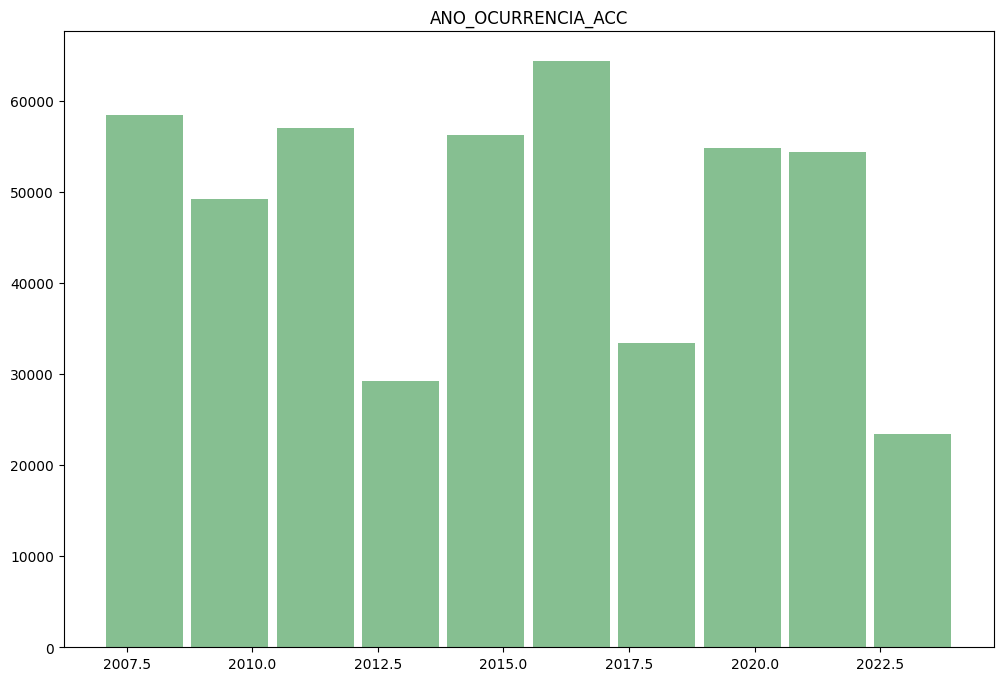

In [14]:
accidentes_data.hist(column='ANO_OCURRENCIA_ACC', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

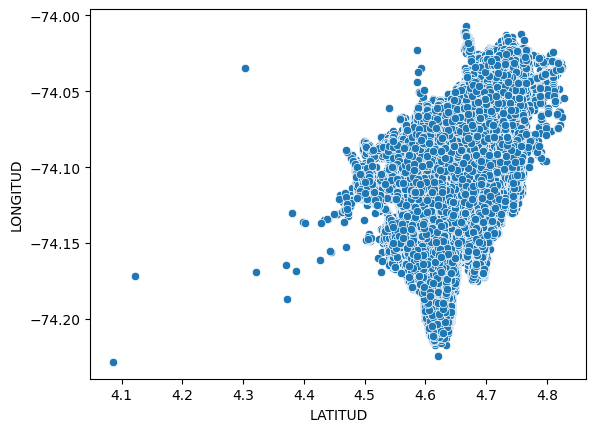

In [15]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

c:\Users\laura\OneDrive\Documentos\GitHub\Proyecto_Analisis_BD\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\laura\OneDrive\Documentos\GitHub\Proyecto_Analisis_BD\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


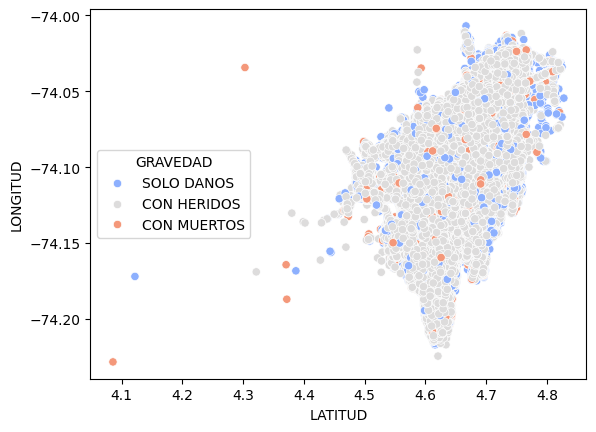

In [16]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "GRAVEDAD", palette = "coolwarm")

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

c:\Users\laura\OneDrive\Documentos\GitHub\Proyecto_Analisis_BD\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\laura\OneDrive\Documentos\GitHub\Proyecto_Analisis_BD\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


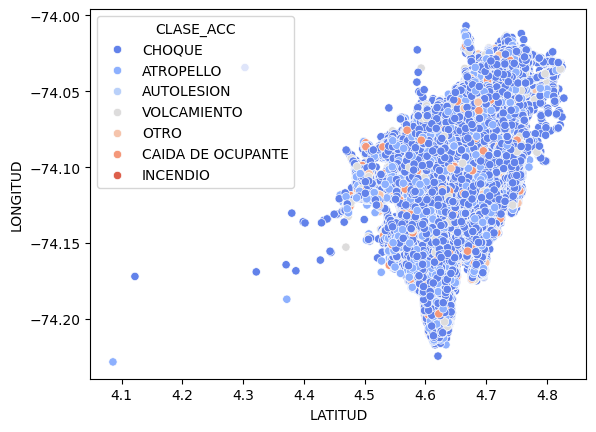

In [17]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "CLASE_ACC", palette = "coolwarm")